#TWITTER SENTIMENT ANALYSIS

##The Problem Statement and Business Case



*   Natural Language Processing (NLP) work by converting words (text) into numbers.


*   These numbers are then used to train an AI/ML model to make predictions.
*   Predictions could be sentiment inferred from social media posts and product reviews.


*   AI/ML-base sentiment analysis is crucial for companies to automatically predict whether their customers are happy or not.
*   In this case study, we will analyze thousands of twitter tweets to predict people's sentiment.







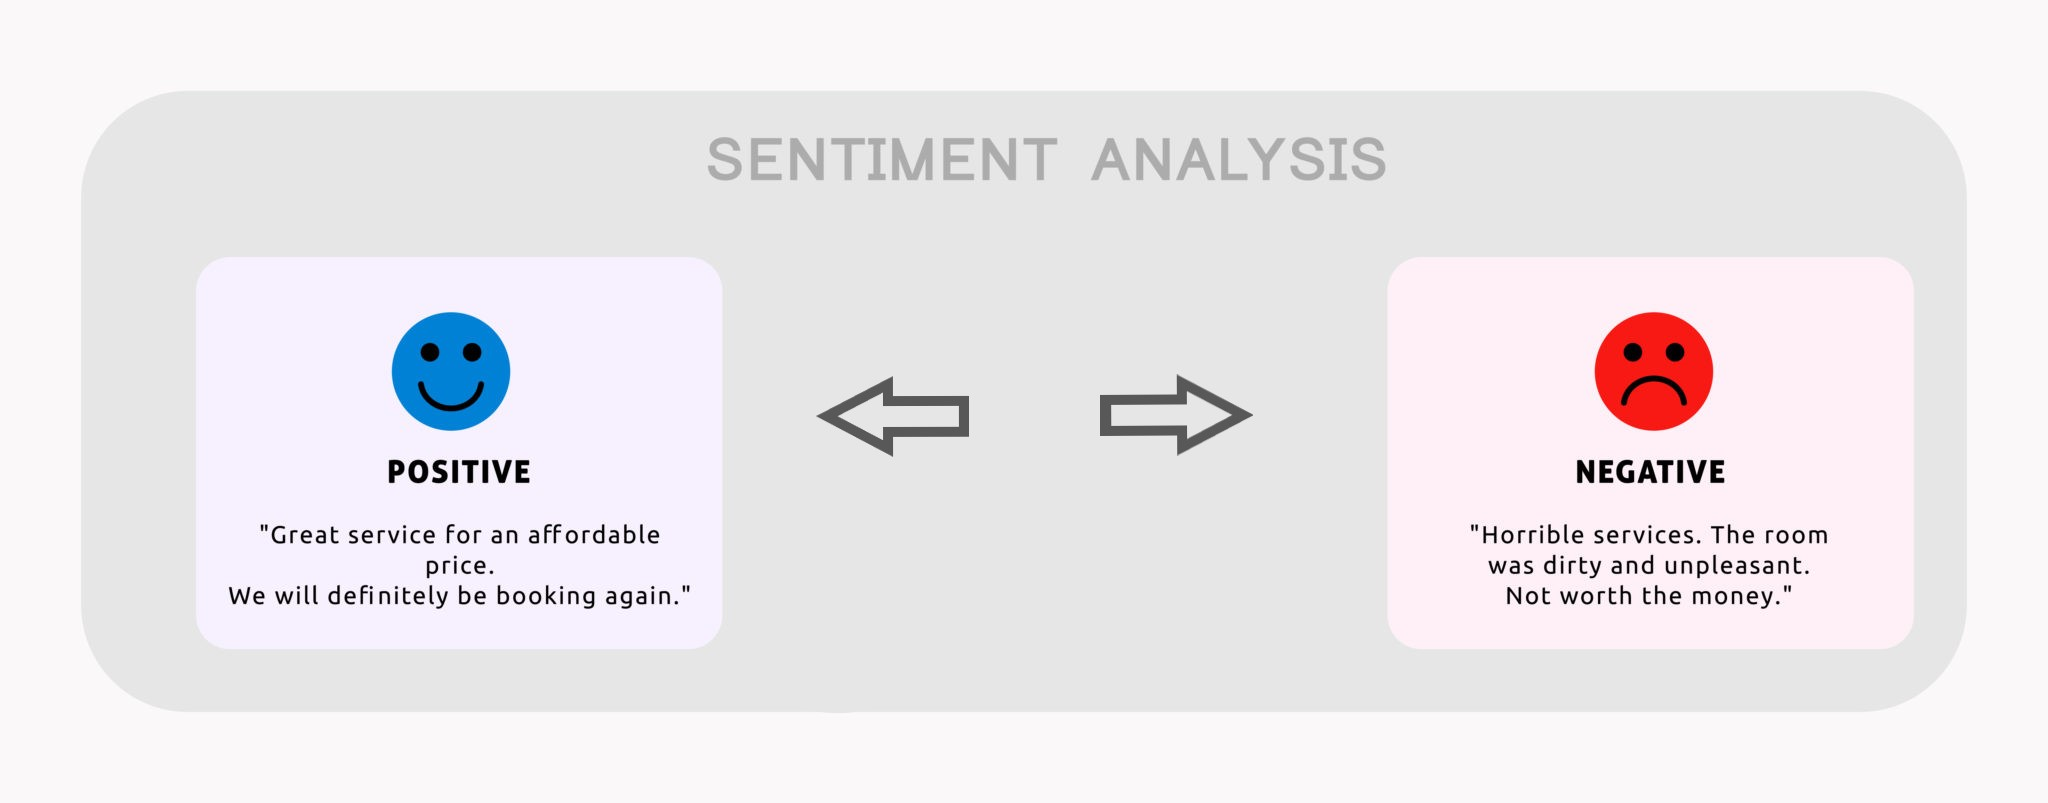



#Import Libraries and Datasets 📚

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
!gdown --id 1yMFCwn7zhaulDgtIXV5KfXV7GEnJLgv4

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1yMFCwn7zhaulDgtIXV5KfXV7GEnJLgv4
To: /content/twitter.csv
100% 953k/953k [00:00<00:00, 101MB/s]


In [ ]:
tweets_df = pd.read_csv('twitter.csv') # read tweeets from dataset
tweets_df

,ItemID,Sentiment,SentimentText,Unnamed: 3
0,1,0,is so sad for my APL frie...,NaN
1,2,0,I missed the New Moon trail...,NaN
2,3,1,omg its already 7:30 :O,NaN
3,4,0,.. Omgaga. Im sooo im gunna CRy. I'...,NaN
4,5,0,i think mi bf is cheating on me!!! ...,NaN
...,...,...,...,...
11111,11112,0,&quot;We were young and times were easy.. But ...,NaN
11112,11113,1,&quot;we will still change color wherever we g...,NaN
11113,11114,1,&quot;welcome home&quot; yay! ...it was a fas...,NaN
11114,11115,1,&quot;Welcome To Hollywood&quot; - Get Mitchel...,NaN


In [ ]:
tweets_df.info() #check the dataset information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11116 entries, 0 to 11115
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ItemID         11116 non-null  int64 
 1   Sentiment      11116 non-null  int64 
 2   SentimentText  11116 non-null  object
 3   Unnamed: 3     11 non-null     object
dtypes: int64(2), object(2)
memory usage: 347.5+ KB


Let's drop unnecessary columns

In [ ]:
tweets_df = tweets_df.drop(columns=['Unnamed: 3', 'ItemID']) 

In [ ]:
tweets_df

,Sentiment,SentimentText
0,0,is so sad for my APL frie...
1,0,I missed the New Moon trail...
2,1,omg its already 7:30 :O
3,0,.. Omgaga. Im sooo im gunna CRy. I'...
4,0,i think mi bf is cheating on me!!! ...
...,...,...
11111,0,&quot;We were young and times were easy.. But ...
11112,1,&quot;we will still change color wherever we g...
11113,1,&quot;welcome home&quot; yay! ...it was a fas...
11114,1,&quot;Welcome To Hollywood&quot; - Get Mitchel...


#Explore Dataset 📊 

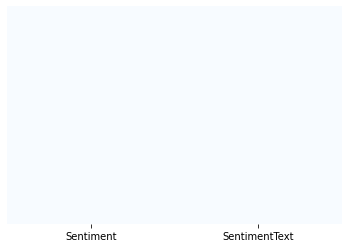

In [ ]:
sns.heatmap(tweets_df.isnull(), yticklabels=False, cbar=False, cmap="Blues")

we don't have any NULL elements and that's good!

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa2b8c48690>]],
      dtype=object)

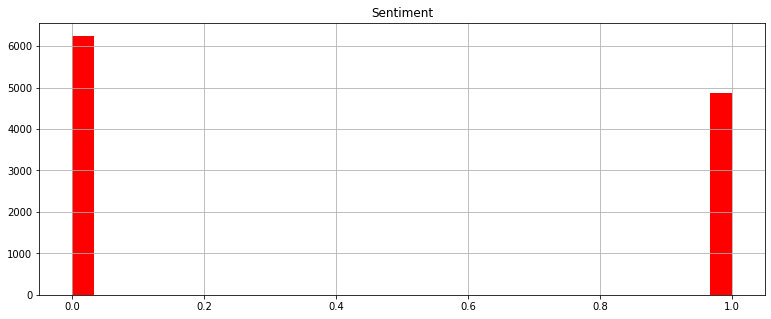

In [ ]:
tweets_df.hist(bins = 30, figsize=(13, 5), color = 'r' ) #visulize sentiment counts

Our dataset is kind of balanced. so we are not worried 👊

we are going to plot similar figure using seaborn countplot.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


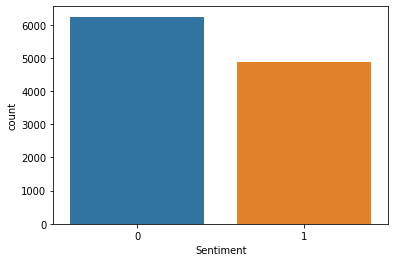

In [ ]:
sns.countplot(tweets_df['Sentiment'], label = "Count") #visulize sentiment counts with seaborn library

Let's add a Length column to dataframe for text length

In [ ]:
tweets_df['length'] = tweets_df['SentimentText'].apply(len) 

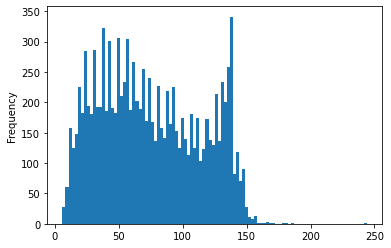

In [ ]:
tweets_df['length'].plot(bins = 100, kind = 'hist')

The distribution of the length of the tweets is shown above.

In [ ]:
tweets_df.describe() 

,Sentiment,length
count,11116.000000,11116.000000
mean,0.438287,75.059374
std,0.496199,39.454810
min,0.000000,6.000000
25%,0.000000,42.000000
50%,0.000000,70.000000
75%,1.000000,109.000000
max,1.000000,244.000000


see the description of dataframe. we can observe that the average text-length is 75.

In [ ]:
tweets_df[tweets_df['length'] == 75]['SentimentText'].iloc[0] #see a sample tweet from dataset

"  I missed the first hour of SYTYCD last night, and I can't find it online!"

We categorize tweets in 2 groups of sentiments:

In [ ]:
positive = tweets_df[tweets_df['Sentiment'] == 1]
negative = tweets_df[tweets_df['Sentiment'] == 0]

# Plot the WordCloud ⛈

WordCloud is a very cool tool which represents word frequencies graphically. We are going to visualize all tweets with it.

In [ ]:
sentences = tweets_df['SentimentText'].tolist()
sentences_as_one_string = " ".join(sentences)

In [ ]:
!pip install WordCloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


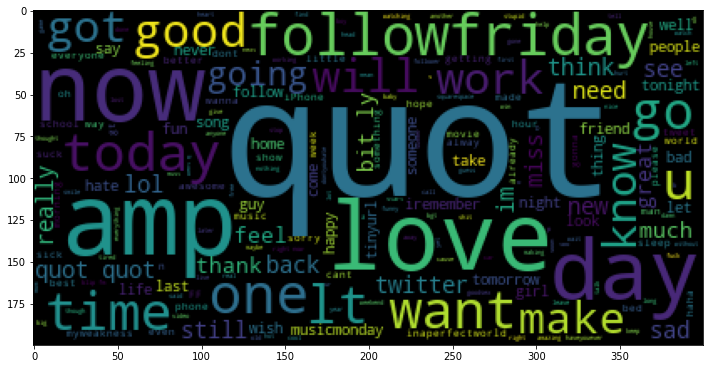

In [ ]:
from wordcloud import WordCloud

plt.figure(figsize=(12,12))
plt.imshow(WordCloud().generate(sentences_as_one_string))

Now let's plot the wordcloud for seperated positive and negative tweets

In [ ]:
positive_string = positive['SentimentText'].tolist()
negative_string = negative['SentimentText'].tolist()

positive_as_one_string = " ".join(positive_string)
negative_as_one_string = " ".join(negative_string)

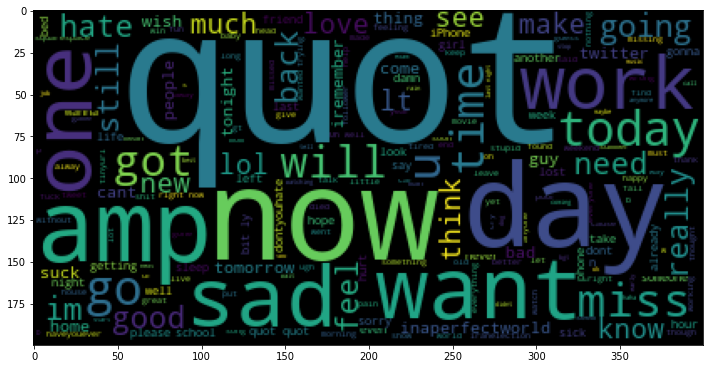

In [ ]:
plt.figure(figsize=(12,12))
plt.imshow(WordCloud().generate(negative_as_one_string)) #visualize negative tweets

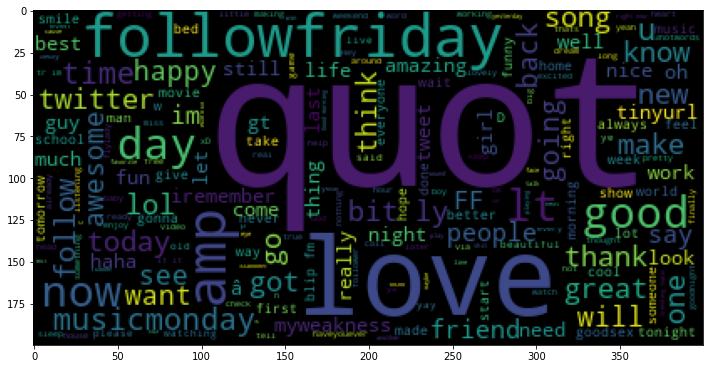

In [ ]:
plt.figure(figsize=(12,12))
plt.imshow(WordCloud().generate(positive_as_one_string)) #visualize positive tweets

# Preprocessing and Data Cleaning 🛁

In [ ]:
import string
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In this task we dont need punctuations or stopwords. beaccause they don't add much value to our text.

In [ ]:
from nltk.corpus import stopwords

#implement a function for data cleaning
def message_cleaning(message):
    pun_removed = [char for char in message if char not in (string.punctuation or ['qoute'])] #remove punctuations
    pun_removed_join = ''.join(pun_removed)
    pun_removed_join_clean = [word for word in pun_removed_join.split() if word.lower() not in stopwords.words('english')] #remove stopwords
    return pun_removed_join_clean

In [ ]:
tweets_df_clean = tweets_df['SentimentText'].apply(message_cleaning)
print(tweets_df_clean)

0                                       [sad, APL, friend]
1                             [missed, New, Moon, trailer]
2                                      [omg, already, 730]
3        [Omgaga, Im, sooo, im, gunna, CRy, Ive, dentis...
4                            [think, mi, bf, cheating, TT]
                               ...                        
11111    [quotWe, young, times, easy, could, see, quot,...
11112    [quotwe, still, change, color, wherever, go, a...
11113           [quotwelcome, homequot, yay, fast, flight]
11114    [quotWelcome, Hollywoodquot, Get, Mitchel, Mus...
11115               [quotWelcome, Titanium, Mobile, close]
Name: SentimentText, Length: 11116, dtype: object


# Vectorization 🔢

In this step we have to translate or transform our text data to a bunch of numbers. we do that using tokenization process.


1.   This is the first paper.
2.   This paper is the second paper.
3.   And this is the third one.
4.   Is this the first paper?


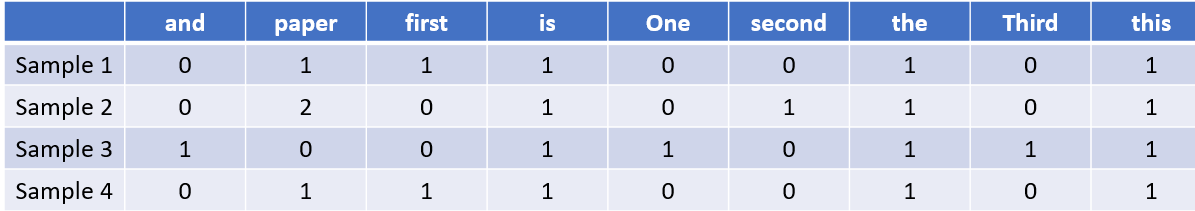





In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(analyzer = message_cleaning)
tweets_countvectorizer = CountVectorizer(analyzer=message_cleaning, dtype='uint8').fit_transform(tweets_df['SentimentText']).toarray()

In [ ]:
tweets_countvectorizer.shape

(11116, 25745)

It means there are 11116 tweets and 25745 unique words in our corpus.

In [ ]:
x = tweets_countvectorizer
y = tweets_df['Sentiment']

# Naive Bayes

#Naive Bayes: Intuition


*   Naive Bayes is a classification technique based on Bayse' Theorem.
*   Let's assume a major bank in NYC and we want to classify a new client as eligible to retire or not.
*   Customer's features are age and salary.



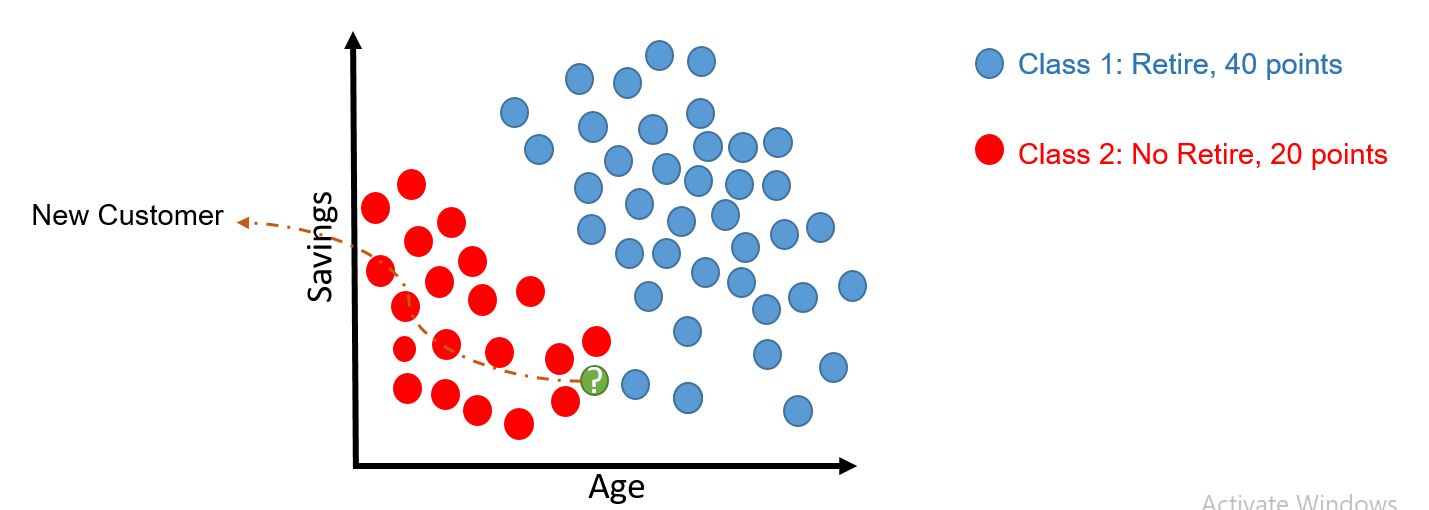

Naive Bayes: Prior Probability


*   Points can be classified as RED or BLUE and our task is to classify a new point to red or blue. 
*   Prior Probability: Since we have more BLUE compared to RED, we can assume that our new point is twice as likely to be BLUE than RED.

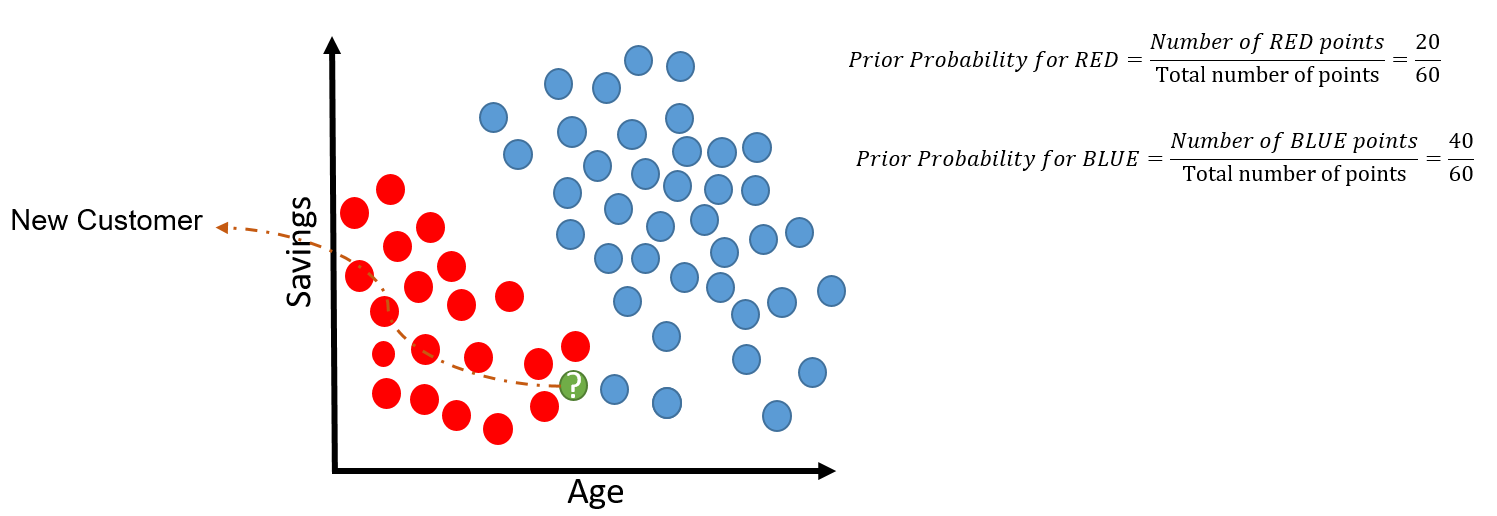




#Naive Basey: Likelihood


*   For the new point, if there are more blue points in its vicinity, it is more likely that the new point will be classified as BLUE.
*   So we draw a circle around the point, then we calculate the number of points in the circle belonging to eac class label.

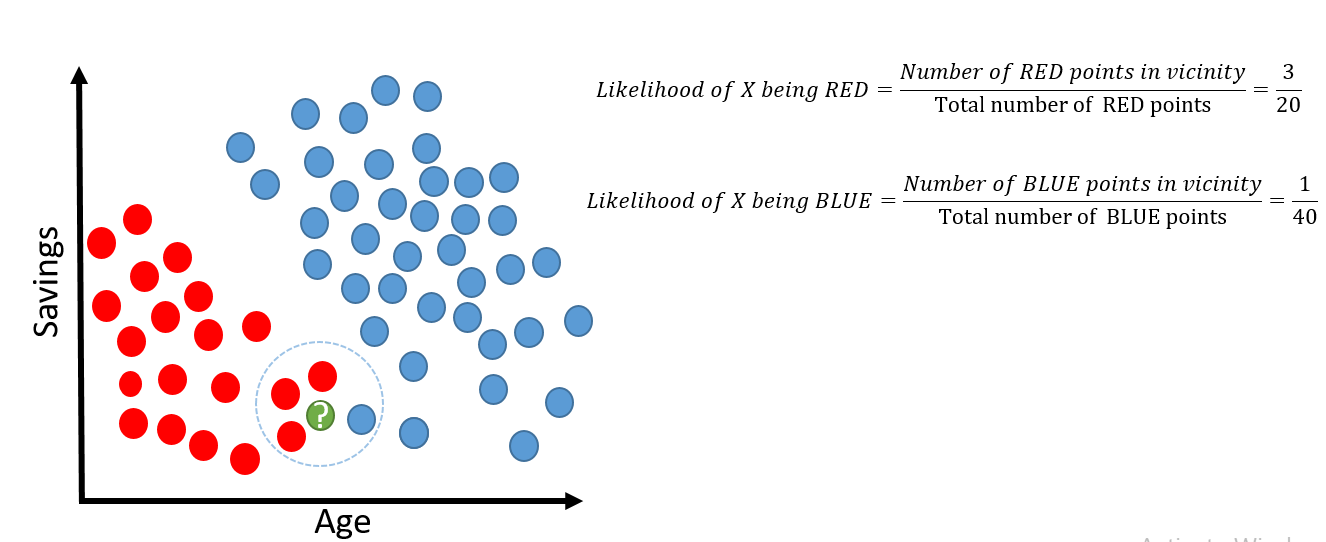


#Naive Bayes: Posterior Probability


*   Let's combine prior probability and likelihood to create a posterior probability

*   Prior probabilities: suggest that X may be classified as BLUE because there are 2x as much blue points.


*   Likelihood: suggests that X is RED because there are more RED points in the vicinity of X.
*   Bayes' Rule combines both to form a posterior probability.

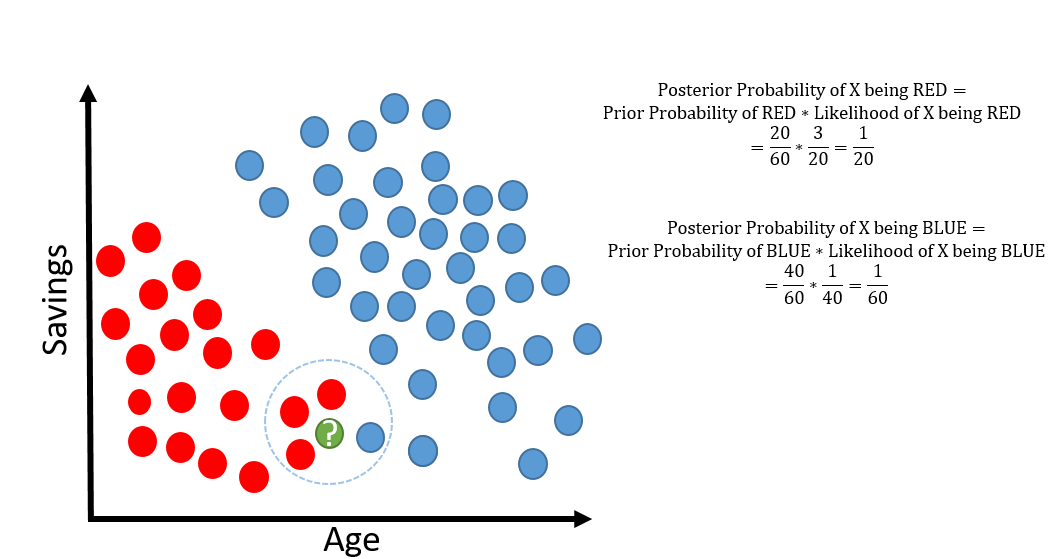





#Naive Bayes: Math(Don't panic)
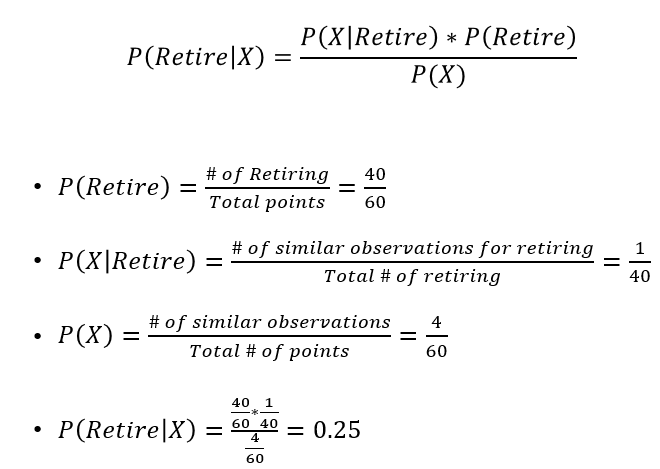

In [ ]:
 x.shape , y.shape

((11116, 25745), (11116,))

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
NB_classifier = MultinomialNB()
NB_classifier.fit(x_train, y_train)

MultinomialNB()

#Evaluation
Confusion Matrix is a performance measurement for machine learning classification.

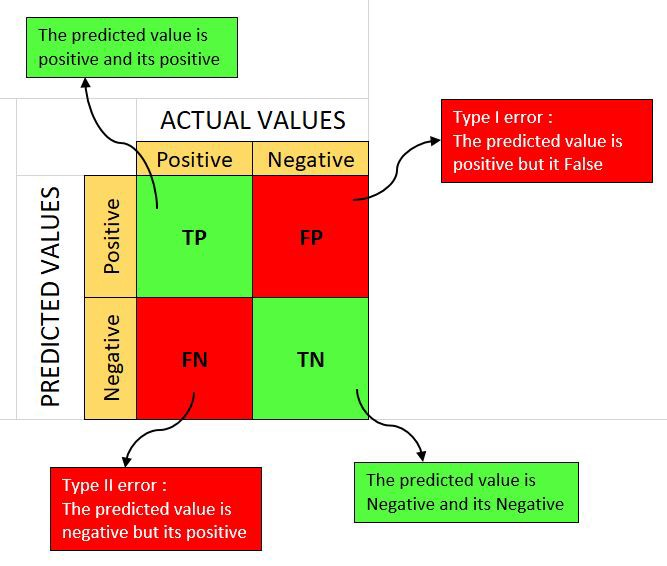

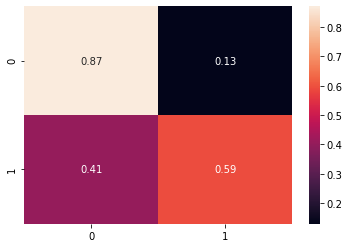

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
y_predit = NB_classifier.predict(x_test)
cm = confusion_matrix(y_test, y_predit, normalize='true')
sns.heatmap(cm, annot=True)

In [ ]:
print(classification_report(y_test, y_predit))

              precision    recall  f1-score   support

           0       0.73      0.87      0.79      1238
           1       0.78      0.59      0.68       986

    accuracy                           0.75      2224
   macro avg       0.76      0.73      0.73      2224
weighted avg       0.75      0.75      0.74      2224

